In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, array_to_img
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
def pre_process():
  base_path = '/content/drive/MyDrive/Machine Learning Assignment/Dataset/'
  types = ['Training', 'Testing']
  x_train = []
  x_test = []
  y_train = []
  y_test = []

  for type_ in types:
    for i, catagory in enumerate(categories):
      partial_path = os.path.join(base_path, type_, catagory)
      images = os.listdir(partial_path)
      for img in images:
        full_path = os.path.join(partial_path, img)
        if type_ == types[0]:
          x_train.append(load_img(full_path, color_mode='grayscale', target_size=(64, 64)))
          y_train.append(i)
        elif type_ == types[1]:
          x_test.append(load_img(full_path, color_mode='grayscale', target_size=(64, 64)))
          y_test.append(i)

  x_validate, x_test, y_validate, y_test = train_test_split(x_test, y_test, test_size=0.40)
  y_train = np.array(y_train)
  y_validate = np.array(y_validate)
  y_test = np.array(y_test)
  x_train = np.array(list(map(img_to_array, x_train)))/255.0
  x_validate = np.array(list(map(img_to_array, x_validate)))/255.0
  x_test = np.array(list(map(img_to_array, x_test)))/255.0
  x_train = np.reshape(x_train, (len(x_train), 64, 64, 1))
  x_validate = np.reshape(x_validate, (len(x_validate), 64, 64, 1))
  x_test = np.reshape(x_test, (len(x_test), 64, 64, 1))
  return x_train, x_validate, x_test, y_train, y_validate, y_test  

In [ ]:
x_train, x_validate, x_test, y_train, y_validate, y_test = pre_process()

In [ ]:
model = Sequential()
model.add(Conv2D(64, (7, 7), activation="relu", padding="same", input_shape=(64, 64, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, (7, 7), input_shape=(64, 64, 1), activation="relu", padding="same"))
model.add(Conv2D(128, (7, 7), input_shape=(64, 64, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(128, (7, 7), input_shape=(64, 64, 1), activation="relu", padding="same"))
model.add(Conv2D(256, (7, 7), input_shape=(64, 64, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        3200      
                                                                 
 batch_normalization_3 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        200768    
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)       401536    
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='auto', factor=0.2, patience=10, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=10, restore_best_weights=True)

Epoch 1/100
180/180 [==============================] - 16s 85ms/step - loss: 0.7799 - accuracy: 0.7074 - val_loss: 1.7542 - val_accuracy: 0.2545 - lr: 0.0100
Epoch 2/100
180/180 [==============================] - 15s 83ms/step - loss: 0.4914 - accuracy: 0.8179 - val_loss: 3.2753 - val_accuracy: 0.2430 - lr: 0.0100
Epoch 3/100
180/180 [==============================] - 15s 84ms/step - loss: 0.4049 - accuracy: 0.8529 - val_loss: 0.9399 - val_accuracy: 0.6565 - lr: 0.0100
Epoch 4/100
180/180 [==============================] - 15s 85ms/step - loss: 0.2743 - accuracy: 0.9002 - val_loss: 1.6240 - val_accuracy: 0.4936 - lr: 0.0100
Epoch 5/100
180/180 [==============================] - 15s 84ms/step - loss: 0.2187 - accuracy: 0.9262 - val_loss: 0.2625 - val_accuracy: 0.8855 - lr: 0.0100
Epoch 6/100
180/180 [==============================] - 15s 84ms/step - loss: 0.1610 - accuracy: 0.9402 - val_loss: 0.1942 - val_accuracy: 0.9300 - lr: 0.0100
Epoch 7/100
180/180 [==============================]

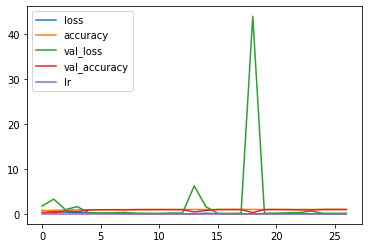

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_validate, y_validate), callbacks=[early_stopping, reduce_lr])
model.save("/content/drive/MyDrive/Machine Learning Assignment/model.h5", overwrite=False)
data_frame = pd.DataFrame(history.history)
data_frame.plot()

In [ ]:
score = model.evaluate(x_test, y_test)
print(score)

17/17 [==============================] - 1s 32ms/step - loss: 0.0580 - accuracy: 0.9829
[0.05795406550168991, 0.9828571677207947]


In [ ]:
model.save("/content/drive/MyDrive/Machine Learning Assignment/CNN98_model.h5", overwrite=False)

# Test with in memory test array

In [ ]:
i = 0
x, y = x_test[i], y_test[i]
y_pred = model.predict(x[None, ...])
classes = np.argmax(y_pred, axis=1)
print('Prediction: ' + np.array(categories)[classes][0])
print('Actual: ' + categories[y])
plt.imshow(array_to_img(x))
plt.axis('off')

# Test with file from folder 

In [ ]:
test_img = load_img('/content/drive/MyDrive/Machine Learning Assignment/Dataset/Training/pituitary/Tr-pi_0023.jpg', target_size=(64, 64), color_mode='grayscale')
img = img_to_array(test_img)/255.0
y_pred = model.predict(img[None, ...])
classes = np.argmax(y_pred, axis=1)
print(np.array(categories)[classes][0])
plt.imshow(test_img)
plt.axis('off')

# Examine test set

In [ ]:
set_len = len(x_test)
incorrect_count = 0
for i in range(set_len):
  x, y = x_test[i], y_test[i]
  y_pred = model.predict(x[None, ...])
  classes = np.argmax(y_pred, axis=1)
  prediction = np.array(categories)[classes][0]
  actual = categories[y]
  if actual != prediction:
    incorrect_count += 1
    print(str(i) + ' :: INCORRECT PREDICTION')
    print('Prediction: ' + prediction)
    print('Actual: ' + actual + '\n')
test_acc = ((set_len - incorrect_count) / set_len) * 100
print('{} / {} incorrect predictions total'.format(incorrect_count, set_len))
print('{:.2f}% accurate'.format(test_acc))